# Most frequent words from the whole dataset

In [3]:
#Get most frequent Words from Negative and Positive Tweets
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import re
import contractions
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image as im
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None  # default='warn'

file_name = '2900_per_day_sentiment'
#Import CSV and create DataFrame
df = pd.read_csv(r'C:\\Users\\Yairb\\Desktop\\PythonPP\\Datasets\\' + file_name + '.csv')

#Get only text and sentiment columns by dropping all the others
df = df.drop(columns=['index', 'Unnamed: 0', 'Unnamed: 0.1', 'textblob_sent_scores', 'vader_sent_comp', 'TextBlob_sent'])

#Rename both columns
df.columns = ['text', 'sentiment']

#Create a DF with only positive sentiment tweets
df_pos = df[df['sentiment'] == 'pos']

#Clean Text
def clean(text):
    text = text.lower()                                          #Lowercase Tweets
    text = re.sub(r'&amp', '', text)                             #Remove '&amp' 
    text = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', text)      #Delete URLs
    text = re.sub('@[^\s]+','',text)                             #Remove @Users
    text = re.sub('#[^\s]+','',text)                             #Remove Hashtags
    text = re.sub(r'[^a-zA-z\'\s\_\_]', '', text)                #Remove special characters such as #, -, " (? and ! in)
    text = text.replace(r"\n", " ")                              #Delete "\n"
    text = re.sub(r'\s+',' ', text)                              #Replace two or more spaces with only one
    return text

#Apply clean function
df['text_cleaned'] = df['text'].apply(clean)

#Expand contractions (output is a tokenized list)
df['text_no_contractions'] = df['text_cleaned'].apply(lambda x: [contractions.fix(word) for word in x.split()])

#Convert tokenized column into strings
df['text_str'] = [' '.join(map(str, each)) for each in df['text_no_contractions']]

#Tokenize again
df['tokenized_text'] = df['text_str'].apply(word_tokenize)

#Remove stop words
stop_words = stopwords.words('english')

df['tokenized_text_no_stopwords'] = df['tokenized_text'].apply(lambda x: 
                                                                [word for word in x 
                                                                if word not in stop_words])
#Convert to String again
df['text_str2'] = [' '.join(map(str, each)) for each in df['tokenized_text_no_stopwords']]
#Drop unnecesary columns
df = df.drop(columns=['text', 'text_cleaned', 'text_no_contractions', 'text_str', 
                      'tokenized_text', 'tokenized_text_no_stopwords']).reset_index()


tweets = df['text_str2']
tweets_arr = tweets.to_numpy()
counter = CountVectorizer()
tweets2 = counter.fit_transform(tweets_arr)
tweets_df = pd.DataFrame(tweets2.toarray(), columns=counter.get_feature_names())

top_words = tweets_df.sum().sort_values(ascending=False).iloc[0:500]
words_dict = top_words.to_dict()

top_words = top_words.to_frame()
top_words = top_words.reset_index().rename(columns={'index': 'Word', 0:'Frequency'})

print(top_words.head(30))

         Word  Frequency
0       trump      38108
1       covid      19608
2      people       5346
3          us       4926
4   americans       4516
5       would       3722
6   president       3643
7        like       3600
8         get       2998
9      trumps       2774
10     donald       2594
11       dead       2442
12      still       2416
13      virus       2378
14        one       2377
15   positive       2304
16      biden       2239
17   pandemic       2212
18       vote       2191
19     deaths       2163
20       says       1914
21      white       1898
22       care       1801
23       mask       1775
24       know       1753
25      house       1723
26       died       1718
27       even       1683
28       many       1664
29      going       1642


In [4]:
print(df['sentiment'].value_counts())

neg    26475
pos    17108
Name: sentiment, dtype: int64


### Create Wordcloud with most frequent words in the whole data set

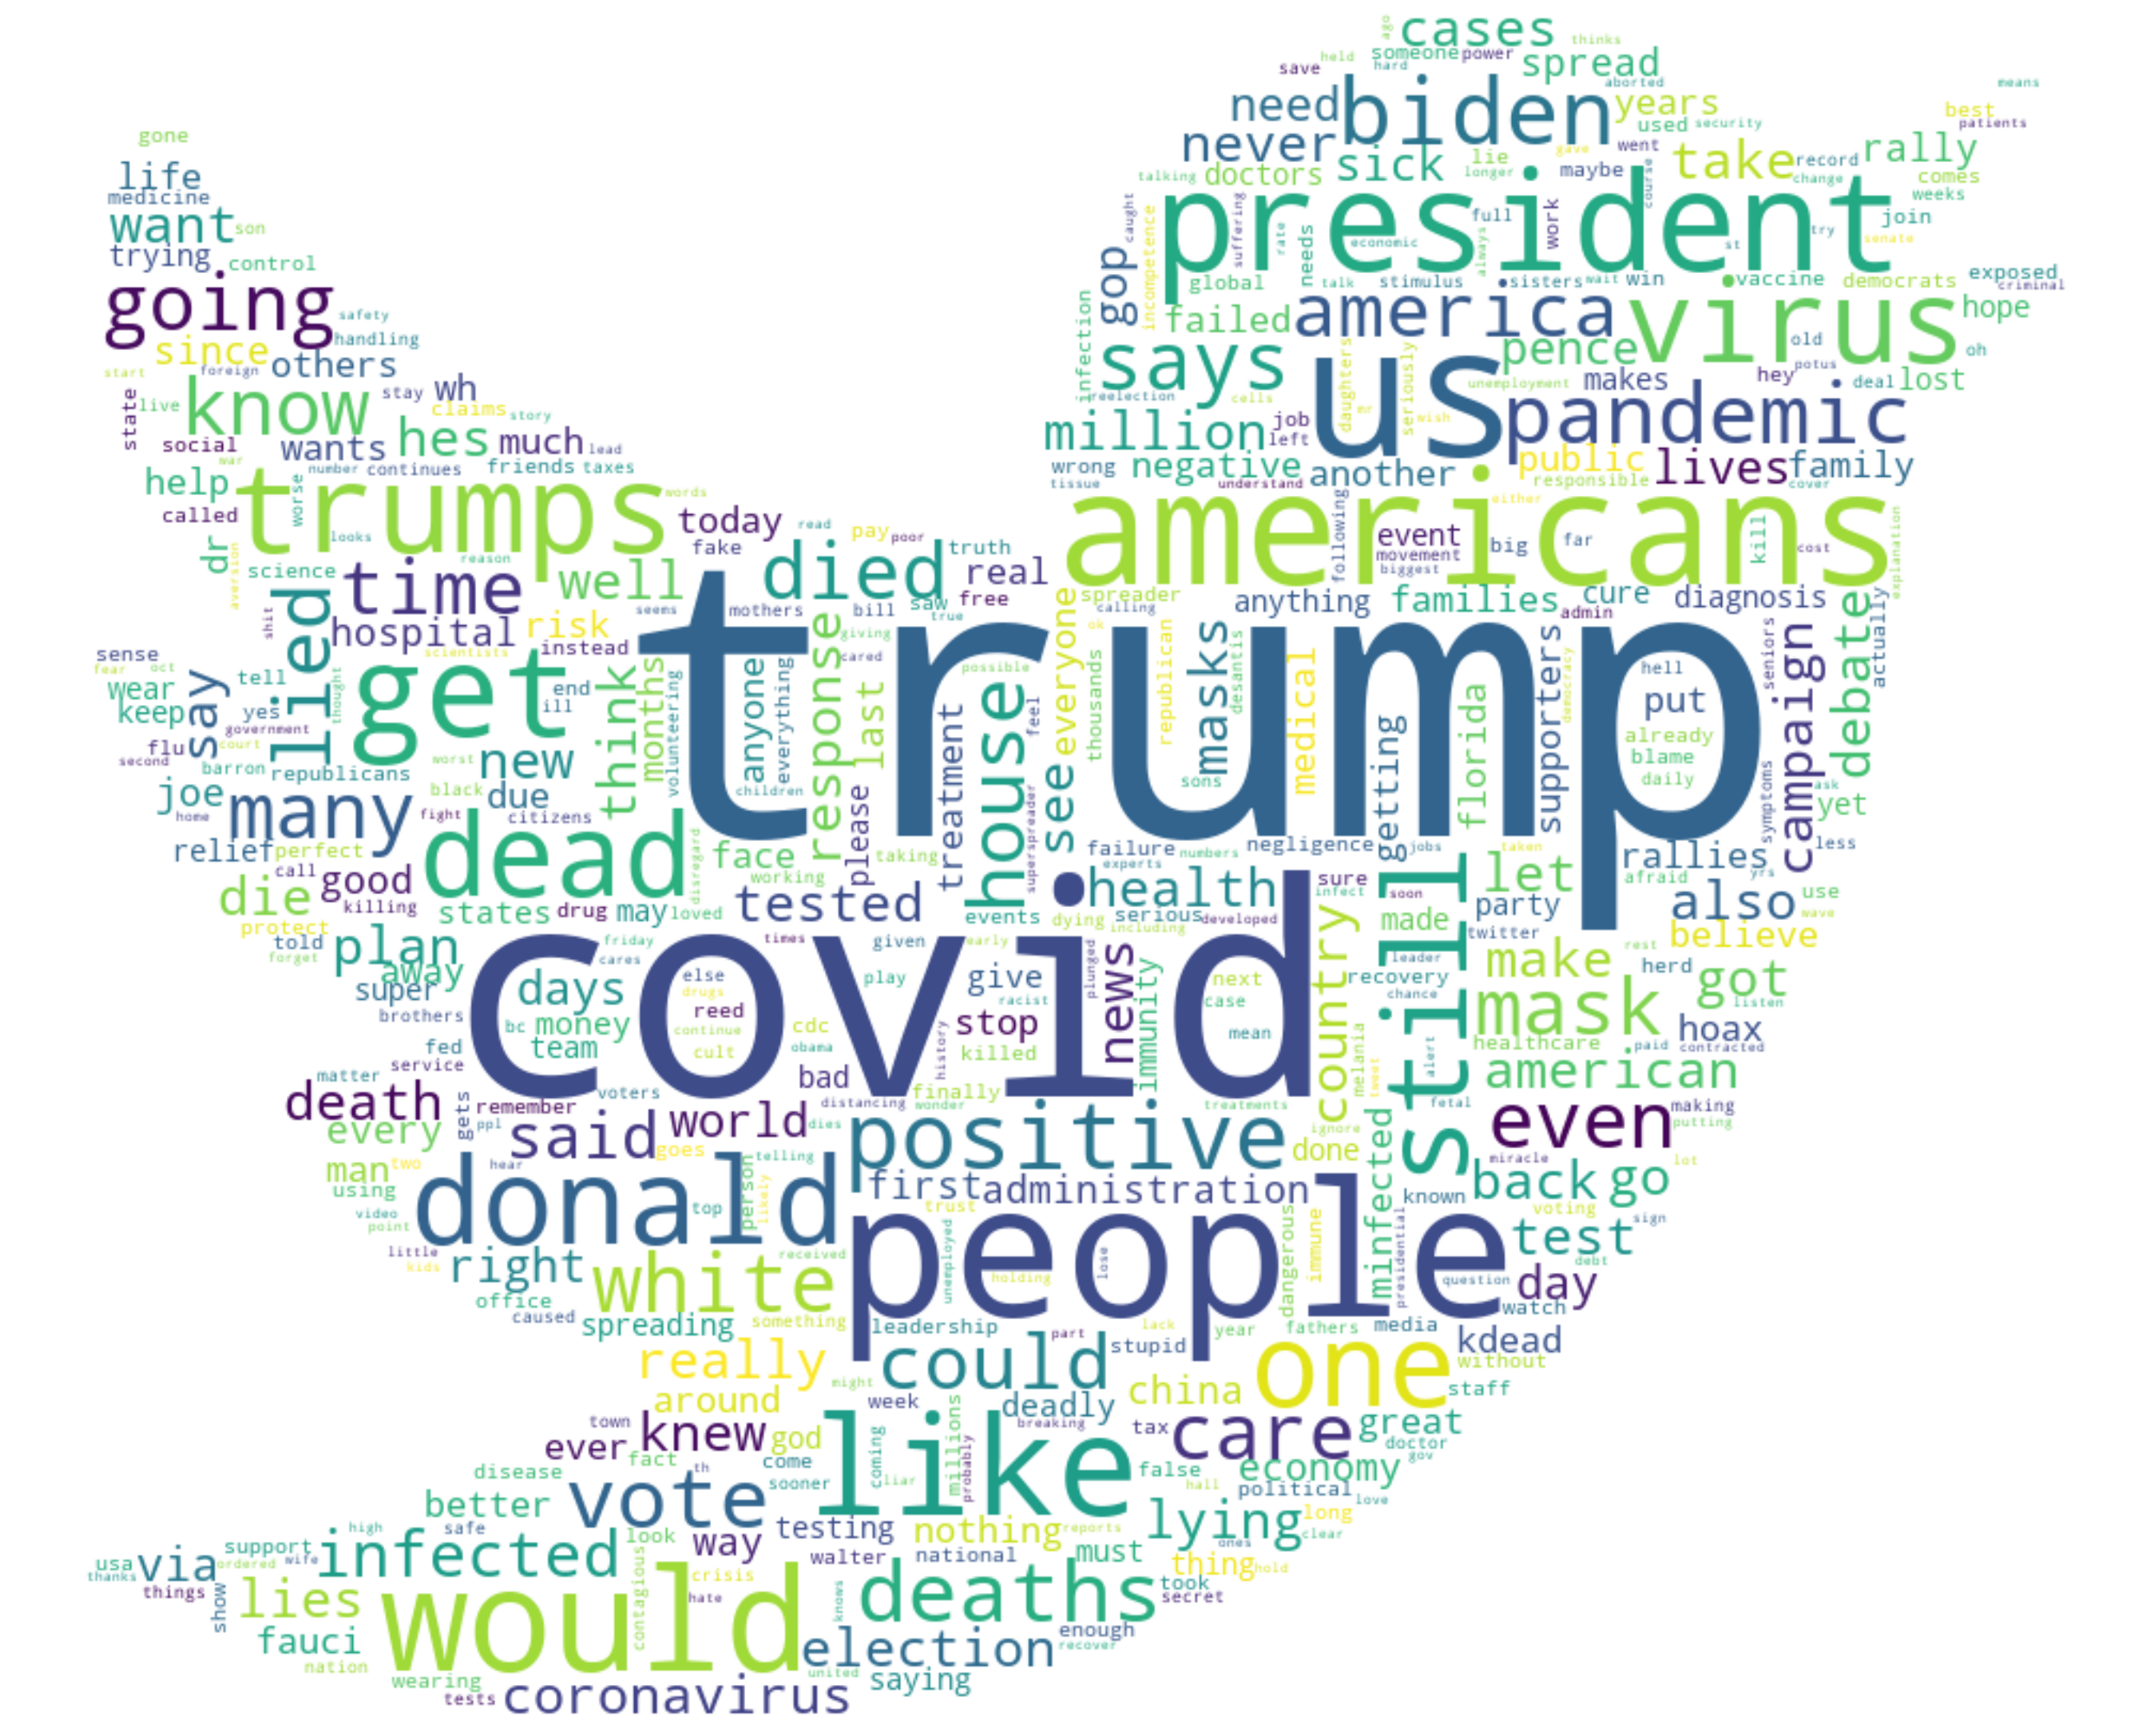

In [5]:
mask = np.array(Image.open(r'C:\Users\yairb\Desktop\PythonPP\twitter_mask.png'))


from wordcloud import WordCloud
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    mask = mask,
    background_color = 'white', 
    max_words=None).generate_from_frequencies(words_dict)
fig = plt.figure(
    figsize = (40, 30))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
plt.close()

### Create Wordcloud with most frequent words

         Word  Frequency
0       trump      38108
1       covid      19608
2      people       5346
3          us       4926
4   americans       4516
5       would       3722
6   president       3643
7        like       3600
8         get       2998
9      trumps       2774
10     donald       2594
11       dead       2442
12      still       2416
13      virus       2378
14        one       2377
15   positive       2304
16      biden       2239
17   pandemic       2212
18       vote       2191
19     deaths       2163
20       says       1914
21      white       1898
22       care       1801
23       mask       1775
24       know       1753
25      house       1723
26       died       1718
27       even       1683
28       many       1664
29      going       1642


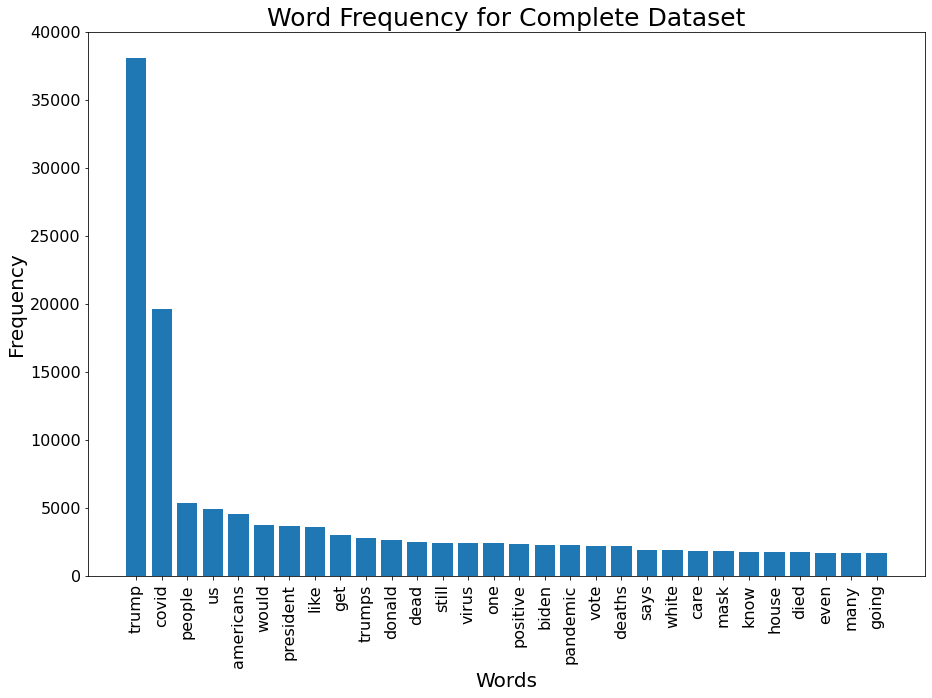

In [6]:
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

top_words = top_words.iloc[0:30]
print(top_words)
fig, ax = plt.subplots(figsize=[15,10])
plt.bar(top_words['Word'], top_words['Frequency'])
plt.title("Word Frequency for Complete Dataset", fontsize=25)
plt.ylabel("Frequency", fontsize=20)
plt.xlabel("Words", fontsize=20)
plt.xticks(rotation=90)
ax.tick_params(axis='x', which='major', pad=5)
plt.show()
